In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.feature_extraction.text import CountVectorizer

if __name__ == '__main__':
    data_dir = 'data_reviews'
    x_train_df = pd.read_csv(os.path.join(data_dir, 'x_train.csv'))
    y_train_df = pd.read_csv(os.path.join(data_dir, 'y_train.csv'))

In [2]:
#load data into python
x_train_df = pd.read_csv('data_reviews/x_train.csv')
#concatenating review to make string processing easier
tr_list_of_sentences = x_train_df['text'].str.cat(sep='\n')
#tr_list_of_sentences

In [621]:
#interesting model stuff
import sklearn
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import loguniform
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [622]:
y_train_df = pd.read_csv('data_reviews/y_train.csv')
y_tr_N = y_train_df.is_positive_sentiment.values.astype(float)

# Preprocessing

In [623]:
'''
Steps:
1. Remove all non-alpha numeric characters from the string
2. Remove stop words
3. Correct spelling

'''

'\nSteps:\n1. Remove all non-alpha numeric characters from the string\n2. Remove stop words\n3. Correct spelling\n\n'

In [624]:
#remove all non-alpha numeric characters from the string
import re

In [625]:
#using regex to remove non_alphanum
def remove_non_alpha_num(reviews_string):
    s = re.sub(r'[!]', ' ! ', reviews_string)
    s = re.sub(r'[?]', ' ? ', s)
    s = re.sub(r'[.]', ' ', s)
    s = re.sub(r'[^A-Za-z\'\n\s!?]+', '', s)
    s = s.lower()
    return s
               
    
    

In [626]:
#Unit Tests
remove_non_alpha_num("can't.do this")
#remove_non_alpha_num("!?hello *&*^*^")

"can't do this"

In [627]:
#remove stop words
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet


In [628]:
#stop_words

In [735]:
stop_words = set(stopwords.words('english'))
stop_words = {word.replace("'", '') for word in stop_words}
toRemove = {"not", "couldn't", "shouldn't", "didn't", "doesn't", "don't", "wasn't", "wouldn't", "won't", "again"}
for entry in toRemove:
    stop_words.discard(entry)

In [660]:
#https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
def remove_stop_words(reviews_string, remove_words):
    reviews_list = reviews_string.split('\n')
    filtered_sentences = []
    for review in reviews_list:
        r = review.split()
        filtered_words = [w for w in r if w not in remove_words]
        filtered_sentence = ' '.join(filtered_words)
        filtered_sentences.append(filtered_sentence)
    
    filtered_sentences = '\n'.join(filtered_sentences)
    return filtered_sentences
    

In [686]:

#using the approach from lab
def tokenize_text(raw_text):
    ''' Transform a plain-text string into a list of tokens
    
    We assume that *whitespace* divides tokens.
    
    Args
    ----
    raw_text : string
    
    Returns
    -------
    list_of_tokens : list of strings
        Each element is one token in the provided text
    '''
    list_of_tokens = raw_text.split() # split method divides on whitespace by default
    for pp in range(len(list_of_tokens)):
        cur_token = list_of_tokens[pp]
        # Remove punctuation
        for punc in ['_', '.', ',', '"', '/']:
            cur_token = cur_token.replace(punc, "")
        # Turn to lower case
        clean_token = cur_token.lower()
        # Replace the cleaned token into the original list
        list_of_tokens[pp] = clean_token
    return list_of_tokens

In [687]:
tokenize_text(" ! ")

['!']

In [688]:
from spellchecker import SpellChecker

In [689]:
#correct spelling
#https://pyspellchecker.readthedocs.io/en/latest/
def correct_spelling(reviews_string):
    reviews_list = reviews_string.split('\n')
    correctly_spelled_sentences = []
    
    speller = SpellChecker()
    
    for review in reviews_list:
        words = review.split()
        correctly_spelled_words = [speller.correction(word) if speller.correction(word) is not None else word for word in words]
        correct_sentence = ' '.join(correctly_spelled_words)
        correctly_spelled_sentences.append(correct_sentence)
    
    corrected_reviews_string = '\n'.join(correctly_spelled_sentences)
    return corrected_reviews_string


In [690]:
import nltk
#nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet')

In [691]:
nltk.pos_tag(["beautiful"])[0][1][0]

'N'

In [692]:
#https://www.geeksforgeeks.org/part-speech-tagging-stop-words-using-nltk-python/
#nltk.pos_tag(["hello"])[0][1][0].lower()
def get_pos_tag(word):
    word_tag = nltk.pos_tag([word])[0][1][0].lower()
    tag_dict = {"j": wordnet.ADJ, "n": wordnet.NOUN, "v": wordnet.VERB, "r": wordnet.ADV}
    
    return tag_dict.get(word_tag, "n")


In [693]:
def lemmatize_words(reviews_string):
    reviews_list = reviews_string.split('\n')
    wnl = WordNetLemmatizer()
    
    
    lemmatized_text = [" ".join([wnl.lemmatize(word, get_pos_tag(word)) for word in tokenize_text(review)]) for review in reviews_list]
    
    lemmatized_data = "\n".join(lemmatized_text)
    
    return lemmatized_data



In [694]:
#The following code is from the Bag of Words Lab

def create_tok_count(list_of_sentences):
    
    tok_count_dict = dict()

    for line in list_of_sentences:
        tok_list = tokenize_text(line)
        for tok in tok_list:
            if tok in tok_count_dict:
                tok_count_dict[tok] += 1
            else:
                tok_count_dict[tok] = 1
                    
    return tok_count_dict

In [695]:
import afinn

In [696]:

from afinn import Afinn

def determine_sentiment(word):
    afinn = Afinn()
    score = afinn.score(word)
    
    if score > 0:
        return 1  # Positive sentiment
    elif score < 0:
        return -1  # Negative sentiment
    else:
        return 0  # Neutral/Indeterminate sentiment



In [697]:
# Example usage
word = "okay"
result = determine_sentiment(word)
print(result)  # 1 for positive sentiment

0


In [698]:
FREQ_THRESHOLD = 2
def build_vocab_list(reviews_string):
    list_of_sentences = reviews_string.split('\n')
    
    tok_count_dict = create_tok_count(list_of_sentences)
    sorted_tokens = list(sorted(tok_count_dict, key=tok_count_dict.get, reverse=True))
    
    vocab_list = [w for w in sorted_tokens[:] if ((tok_count_dict[w] >= FREQ_THRESHOLD) or (determine_sentiment(w) != 0))]
    #vocab_list = [w for w in sorted_tokens[:] if ((tok_count_dict[w] >= FREQ_THRESHOLD))]
    
    vocab_dict = dict()
    for vocab_id, tok in enumerate(vocab_list):
        vocab_dict[tok] = vocab_id
    
    return vocab_dict, len(list_of_sentences), len(vocab_list)
    

In [699]:

# list_of_sentences = reviews_string.split('\n')
    
# tok_count_dict = create_tok_count(list_of_sentences)
# sorted_tokens = list(sorted(tok_count_dict, key=tok_count_dict.get, reverse=True))

# vocab_list = [w for w in sorted_tokens[:] if tok_count_dict[w] >= FREQ_THRESHOLD]

# vocab_dict = dict()
# for vocab_id, tok in enumerate(vocab_list):
#     vocab_dict[tok] = vocab_id

    

In [700]:
# tok_count_dict[sorted_tokens[0]]
# sorted_tokens[0]

In [701]:
def transform_text_into_feature_vector(text, vocab_dict):
    ''' Produce count feature vector for provided text
    
    Args
    ----
    text : string
        A string of raw text, representing a single 'review'
    vocab_dict : dict with string keys
        If token is in vocabulary, will exist as key in the dict
        If token is not in vocabulary, will not be in the dict

    Returns
    -------
    count_V : 1D numpy array, shape (V,) = (n_vocab,)
        Count vector, indicating how often each vocab word
        appears in the provided text string
    '''
    V = len(vocab_dict.keys())
    count_V = np.zeros(V)
    for tok in tokenize_text(text):
        if tok in vocab_dict:
            vv = vocab_dict[tok]
            count_V[vv] += 1
    return count_V

In [702]:
#DO NOT TOUCH THESE: THEY TAKE A LONG TIME TO RUN

In [703]:
def preprocess_string(tr_list_of_sentences):
    original_review_string = tr_list_of_sentences
    reviews_string = remove_non_alpha_num(tr_list_of_sentences)
    reviews_string = correct_spelling(reviews_string)
    reviews_string = lemmatize_words(reviews_string)
    reviews_string = remove_stop_words(reviews_string, stop_words)
    return reviews_string, original_review_string

In [704]:

reviews_string, original_review_string = preprocess_string(tr_list_of_sentences)

In [ ]:

# original_review_string = tr_list_of_sentences
# reviews_string = remove_non_alpha_num(tr_list_of_sentences)
# reviews_string = correct_spelling(reviews_string)
# reviews_string = lemmatize_words(reviews_string)

In [736]:
reviews_string = remove_stop_words(reviews_string, stop_words)

In [578]:
#original_review_string = tr_list_of_sentences
# reviews_string

In [579]:
#I think I have just improved the text processing. Let's see what models can do for me now

In [600]:
MAX_FEATURES = 5000
vectorizer = CountVectorizer(max_features = MAX_FEATURES)
X = vectorizer.fit_transform(reviews_string.split("\n"))
x_prepared_NV = X.toarray()

(2400, 3725)

In [737]:
vocab_dict, N, V = build_vocab_list(reviews_string)
x_prepared_NV = np.zeros((N, V))
for nn, raw_text_line in enumerate(reviews_string.split("\n")):
    x_prepared_NV[nn] = transform_text_into_feature_vector(raw_text_line, vocab_dict)

# Creating Model

In [804]:
model = sklearn.linear_model.LogisticRegression(solver='lbfgs', max_iter=300)
SEED = 2
FOLDS = 15


In [739]:
cRange = loguniform(1e-3, 1e3)
tol = [0, 1e-1,1e-2,1e-3,1e-4,1e-5]

In [776]:
#solver 'lbfgs' does not support an l1 penalty
distributions = {
    'C': cRange,
    'penalty': ['l2']
    #'tol': tol,
    #'fit_intercept': [True, False]
}

In [806]:
curr_search = RandomizedSearchCV(
    estimator = model,
    param_distributions = distributions,
    scoring = 'roc_auc',
    cv = FOLDS,
    
    )

In [787]:
import matplotlib
import matplotlib.pyplot as plt

In [788]:
C_grid = np.logspace(-6, 6, 10)
C_grid

array([1.00000000e-06, 2.15443469e-05, 4.64158883e-04, 1.00000000e-02,
       2.15443469e-01, 4.64158883e+00, 1.00000000e+02, 2.15443469e+03,
       4.64158883e+04, 1.00000000e+06])

In [789]:
curr_search.fit(x_prepared_NV, y_tr_N)

/Users/liam/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/liam/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

/Users/liam/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/liam/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

RandomizedSearchCV(cv=20, estimator=LogisticRegression(max_iter=300),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f84041baad0>,
                                        'penalty': ['l2']},
                   scoring='roc_auc')

In [790]:
#Best score: 0.8945833333333333: using my dictionary
#0.8894114583333333 using CountVectorize()

#After cleaning data:
#using CountVectorize(): 0.8946927083333335
#Using my dictionary: 0.8967708333333334

#trying again:
#using my dictionary: 0.8929
#using countvectorize(): 0.888

#no apostrophes

In [803]:
print('Best params:', curr_search.best_params_)
print('Best score:', curr_search.best_score_)
print('Best pipeline:', curr_search.best_estimator_)
print('Index of best pipeline:', curr_search.best_index_)
results=pd.DataFrame(curr_search.cv_results_)
results #see results of test

Best params: {'C': 0.5381114029010693, 'penalty': 'l2'}
Best score: 0.8946111111111111
Best pipeline: LogisticRegression(C=0.5381114029010693, max_iter=300)
Index of best pipeline: 3


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,...,split13_test_score,split14_test_score,split15_test_score,split16_test_score,split17_test_score,split18_test_score,split19_test_score,mean_test_score,std_test_score,rank_test_score
0,0.104437,0.012375,0.001782,0.000351,0.526177,l2,"{'C': 0.5261767150507294, 'penalty': 'l2'}",0.937222,0.921111,0.938889,...,0.900556,0.852778,0.858611,0.907778,0.930556,0.941111,0.873889,0.894569,0.035301,2
1,0.251091,0.020943,0.002006,0.000325,8.896969,l2,"{'C': 8.896969297358647, 'penalty': 'l2'}",0.904444,0.909722,0.919722,...,0.884444,0.850278,0.851667,0.897500,0.894167,0.939167,0.862500,0.883583,0.032159,3
2,0.028677,0.001793,0.001707,0.000152,0.001676,l2,"{'C': 0.0016757857978465414, 'penalty': 'l2'}",0.869444,0.848333,0.883333,...,0.834167,0.758889,0.828056,0.838889,0.878056,0.879444,0.831667,0.824417,0.054086,9
3,0.107326,0.011813,0.001903,0.000323,0.538111,l2,"{'C': 0.5381114029010693, 'penalty': 'l2'}",0.937222,0.921389,0.938889,...,0.900278,0.852778,0.858611,0.908611,0.930833,0.941111,0.873611,0.894611,0.035273,1
4,0.747402,0.045568,0.002425,0.000250,803.043292,l2,"{'C': 803.0432924227676, 'penalty': 'l2'}",0.839722,0.842222,0.851667,...,0.832778,0.772500,0.799167,0.864722,0.801111,0.907778,0.818611,0.822000,0.040257,10
5,0.629825,0.056573,0.002163,0.000300,196.865769,l2,"{'C': 196.8657686540476, 'penalty': 'l2'}",0.850556,0.854444,0.871667,...,0.850833,0.792222,0.817222,0.879722,0.830833,0.916389,0.840556,0.840958,0.037142,7
6,0.050629,0.010272,0.002679,0.000788,0.018225,l2,"{'C': 0.01822486874332968, 'penalty': 'l2'}",0.901667,0.875556,0.913611,...,0.864444,0.784722,0.839444,0.872778,0.905556,0.901111,0.857222,0.852014,0.048496,6
7,0.069676,0.007671,0.002249,0.000391,0.081482,l2,"{'C': 0.08148220408629418, 'penalty': 'l2'}",0.931667,0.900000,0.934722,...,0.885556,0.818056,0.846389,0.889444,0.925000,0.921667,0.871389,0.876986,0.041186,4
8,0.661188,0.216268,0.003150,0.000776,64.408414,l2,"{'C': 64.40841410554434, 'penalty': 'l2'}",0.866944,0.871389,0.889722,...,0.862778,0.814167,0.833889,0.885000,0.852778,0.926944,0.852222,0.857444,0.034618,5
9,0.876610,0.120858,0.002610,0.000628,423.831727,l2,"{'C': 423.83172733390427, 'penalty': 'l2'}",0.841389,0.847500,0.862222,...,0.842778,0.778611,0.804444,0.871944,0.816667,0.912222,0.830556,0.830236,0.040175,8


In [792]:
results['param_C']

0      0.526177
1      8.896969
2      0.001676
3      0.538111
4    803.043292
5    196.865769
6      0.018225
7      0.081482
8     64.408414
9    423.831727
Name: param_C, dtype: object

In [793]:
results['mean_test_score']

0    0.894569
1    0.883583
2    0.824417
3    0.894611
4    0.822000
5    0.840958
6    0.852014
7    0.876986
8    0.857444
9    0.830236
Name: mean_test_score, dtype: float64

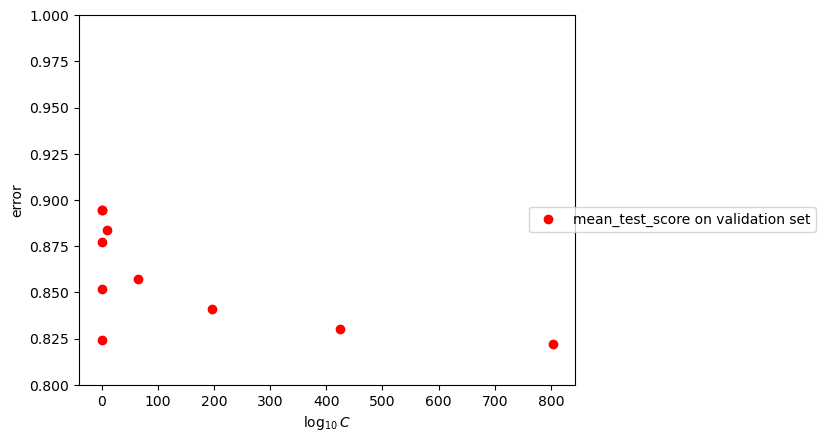

In [802]:
plt.plot(results['param_C'], results['mean_test_score'], 'ro', label='mean_test_score on validation set')
# plt.plot(np.log10(C_grid), va_bce_list, 'rs-', label='valid BCE')

# plt.plot(np.log10(C_grid), tr_err_list, 'b:', label='train err')
# plt.plot(np.log10(C_grid), va_err_list, 'r:', label='valid err')

plt.ylabel('error')
plt.xlabel("$\log_{10} C$");
plt.legend(bbox_to_anchor=(1.5, 0.5)) # make legend outside plot
plt.ylim([0.8, 1.0]);

In [522]:
#getting a leaderboard score:
x_test_df = pd.read_csv('data_reviews/x_test.csv')
test_list_of_sentences = x_test_df['text'].str.cat(sep='\n')

In [523]:
#cleaning test data

In [324]:
test_list_of_sentences, blah = preprocess_string(test_list_of_sentences)

In [325]:
# test_list_of_sentences = remove_non_alpha_num(test_list_of_sentences)

In [326]:
#test_list_of_sentences = correct_spelling(test_list_of_sentences)

In [327]:
# test_list_of_sentences = remove_stop_words(test_list_of_sentences, stop_words)

In [328]:
#determining test data size
list_of_sentences2 = test_list_of_sentences.split('\n')
Z = len(list_of_sentences2)
x_tr_ZV = np.zeros((Z, V))

In [329]:
for nn2, raw_text_line2 in enumerate(list_of_sentences2):
    x_tr_ZV[nn2] = transform_text_into_feature_vector(raw_text_line2, vocab_dict)

In [330]:
yhat_test_N = curr_search.predict_proba(x_tr_ZV)

In [331]:
np.savetxt("yproba1_test.txt", yhat_test_N[:, 1])

In [745]:
train_predictions = curr_search.predict(x_prepared_NV)
probas = curr_search.predict_proba(x_prepared_NV)
b = ~np.equal(train_predictions, y_tr_N)
indices = np.flatnonzero(b)
print(len(indices))

133


In [746]:
for i in indices:
    print("Butchered Review:")
    print(reviews_string.split("\n")[i])
    #print('\n')
    print("Original Review:")
    print(original_review_string.split("\n")[i])
    #print('\n')
    print("Probability:", probas[i])
    print("Predicted:", train_predictions[i])
    print("Actual:", y_tr_N[i])
    print('\n')
    
    

Butchered Review:
really want plantronics right one many issue good
Original Review:
I really wanted the Plantronics 510 to be the right one, but it has too many issues for me.The good
Probability: [0.15517271 0.84482729]
Predicted: 1.0
Actual: 0.0


Butchered Review:
excellent starter wireless headset
Original Review:
Excellent starter wireless headset.
Probability: [0.13138337 0.86861663]
Predicted: 1.0
Actual: 0.0


Butchered Review:
i'd expect well consumer experience motorola
Original Review:
All in all, I'd expected a better consumer experience from Motorola.
Probability: [0.49157828 0.50842172]
Predicted: 1.0
Actual: 0.0


Butchered Review:
phone year tell not great
Original Review:
I have had this phone for over a year now, and I will tell you, its not that great.
Probability: [0.31324782 0.68675218]
Predicted: 1.0
Actual: 0.0


Butchered Review:
loudspeaker option great bumper light appeal
Original Review:
The loudspeaker option is great, the bumpers with the lights is very ..

In [729]:

test_string = "Plan on ordering from them again and again."
#preprocess_string(test_string)
reviews_string3 = test_string

In [730]:
reviews_string3 = remove_non_alpha_num(reviews_string3)
reviews_string3

'plan on ordering from them again and again '

In [731]:
reviews_string3 = correct_spelling(reviews_string3)
reviews_string3

'plan on ordering from them again and again'

In [732]:
reviews_string3 = lemmatize_words(reviews_string3)
reviews_string3

'plan on order from them again and again'

In [734]:
reviews_string3 = remove_stop_words(reviews_string3, stop_words)
reviews_string3

'plan order'